### Meshes in 1D 
We will start with the simplest case: 1D domain, $(a,b) \subset \mathbb{R}$, decomposed into $N$ line segments.

source module for methodsNM imported.
source module for methodsNM imported.


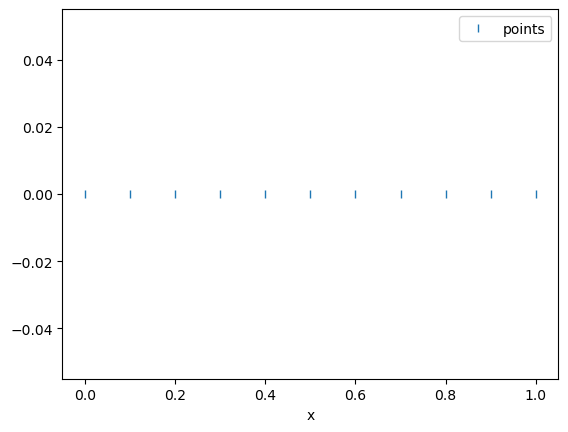

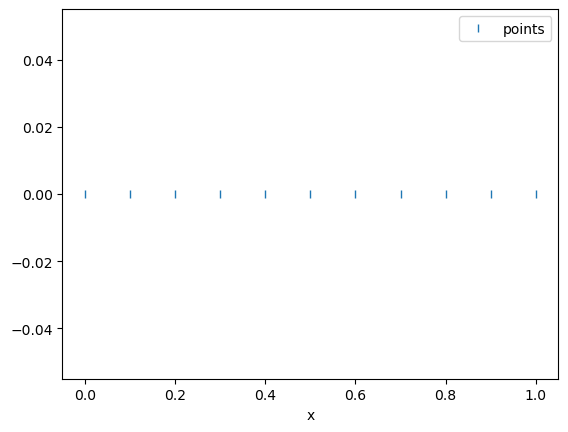

In [1]:
from import_hack import *
from methodsnm.mesh import *
from methodsnm.mesh_1d import *
from methodsnm.visualize import DrawMesh1D
m = Mesh1D([0,1],10)
DrawMesh1D(m)

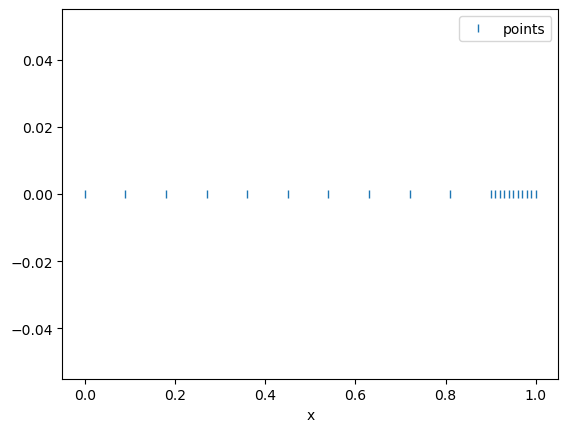

In [2]:
m = Mesh1D([0,0.9,1],10)
DrawMesh1D(m)

In [ ]:
m = m.uniform_refine()
DrawMesh1D(m)

## Mesh functions

We use the term `MeshFunction` for functions that can be evaluated on a mesh using a combination of 
* a mesh element and 
* a (local) integration point. 

To connect the local point of view (integration point) and the global/mesh view we use a **transformation from reference element to physical element**

In 1D: $\Phi_T: (0,1) \to (a,b)$ where $(a,b)$ is the domain of an element $T$ of the mesh.

* $\leadsto$ [Implementation in `trafo.py`](../src/trafo.py)
* $\leadsto$ [Implementation in `mesh.py`](../src/mesh.py)

There are essentially two types of functions that we want to unify with a `MeshFunction`:
* Functions given in world coordinate (not directly related to the mesh)
* Finite element based functions that are naturally described by integration point and element index

Let's take a look at the implementations of `MeshFunction`s:

* $\leadsto$ [Implementation in `mesh.py`](../src/mesh.py)

### Example of a `GlobalFunction`

In [ ]:
from methodsnm.meshfct import *
from methodsnm.visualize import DrawFunction1D
from math import sin, pi
m = Mesh1D([0,1],3)
uex = GlobalFunction(function=lambda x: sin(4*x*pi), mesh=m)
DrawFunction1D(uex, sampling=24, show_mesh=True)

Next, we make the connection between local and global for finite elements.

## Finite element spaces and the global to local map

* Discrete objects so far were only defined on the reference element. 
* With the help of the transformation we can define these on any physical element.
* Next, we need to sum up the contributions and manage the related `dof`s

### `Dof` handling
The finite element space (`FESpace`) basically translates local to global `dof`s. 

We again start by a simple example: piecewise linear elements on a 1D mesh:

* $\leadsto$ [Implementation in `fes.py`](../src/fes.py)
* and the next cell for trying it out

In [ ]:
from methodsnm.fes import *
m = Mesh1D([0,1],10)
fes = P1_Segments_Space(m)
for elnr,el in enumerate(m.elements()):
    print("element number:", elnr, end="\t")
    print("element vertices (indices):", el, end="\t")
    print("global dofs of element:", fes.element_dofs(elnr))

### Tasks

#### Task `FES1D-1`
Add a parameter to the `P1_Segments_Space` class that identifies the most left and the most right `dof`, rending the functions periodic. Adjust `ndof` and the global to local map accordingly.
* What are the `ndofs` now?
* What is the global to local map now?
* Implement the changes directly in `P1_Segments_Space` and test your implementation with the following code:


In [ ]:
m = Mesh1D([0,1],10)
fes = P1_Segments_Space(m, periodic = False)
for elnr,el in enumerate(m.elements()):
    print(el)
    print(fes.element_dofs(elnr))
print(fes.dofs_Rand())

### Global basis functions:

To test the global to local map, let's draw all shape functions of an `FESpace`:

In [ ]:
from methodsnm.meshfct import *
from methodsnm.visualize import DrawFunction1D, DrawShapes


In [ ]:
m = Mesh1D([0,1],2)
DrawShapes(P1_Segments_Space(m))
DrawShapes(P1_Segments_Space(m,periodic = True))

#### Task `FES1D-2`
Implement a finite element space of discontinuous functions corresponding to either (or all):
* the `P1` finite element or
* the `P1*` finite element or
* a new `P0` element of element-wise constant functions

Task:
* Think about the global number of unknowns
* Think about the global to local dof map
* Implemen the FESpace and draw the basis functions



In [ ]:
m = Mesh1D([0,1],3)
DrawShapes(P1_Segments_SpaceUnstetig(m))

#### Task `FES1D-3`
Implement a higher order Lagrange finite element space and draw the basis functions.


In [ ]:
m = Mesh1D([0,1],2)
m.elements()

In [ ]:
m = Mesh1D([0,1],3)
print((m.vertices))
print(Lagrange_Segment_Space(m).element_dofs(0))
DrawShapes(Lagrange_Segment_Space(m), sampling=25)